In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = df.drop(columns = 'class')
y = df['class']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [8]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.9666666666666667

In [9]:
import joblib
joblib.dump(model,'iris.pkl')

['iris.pkl']

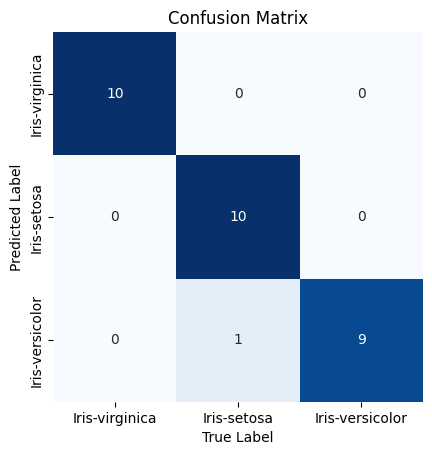

In [9]:
from sklearn.metrics import confusion_matrix
labels = ['Iris-virginica', 'Iris-setosa','Iris-versicolor']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

In [1]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(path)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [59]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [60]:
df.groupby('sex').count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,,,
female,165,165,165,165,165,165
male,168,168,168,168,168,168


In [118]:
X = df.drop(columns = 'species').drop(columns = 'island').drop(columns = 'sex')
y = df['species']
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,36.7,19.3,193,3450
4,39.3,20.6,190,3650
...,...,...,...,...
328,55.8,19.8,207,4000
329,43.5,18.1,202,3400
330,49.6,18.2,193,3775
331,50.8,19.0,210,4100


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [120]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred = model.predict(X_test)
y_pred

array(['Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap'], dtype=object)

In [122]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.9850746268656716

In [66]:
import joblib
joblib.dump(model,'pinguini.pkl')

['pinguini.pkl']

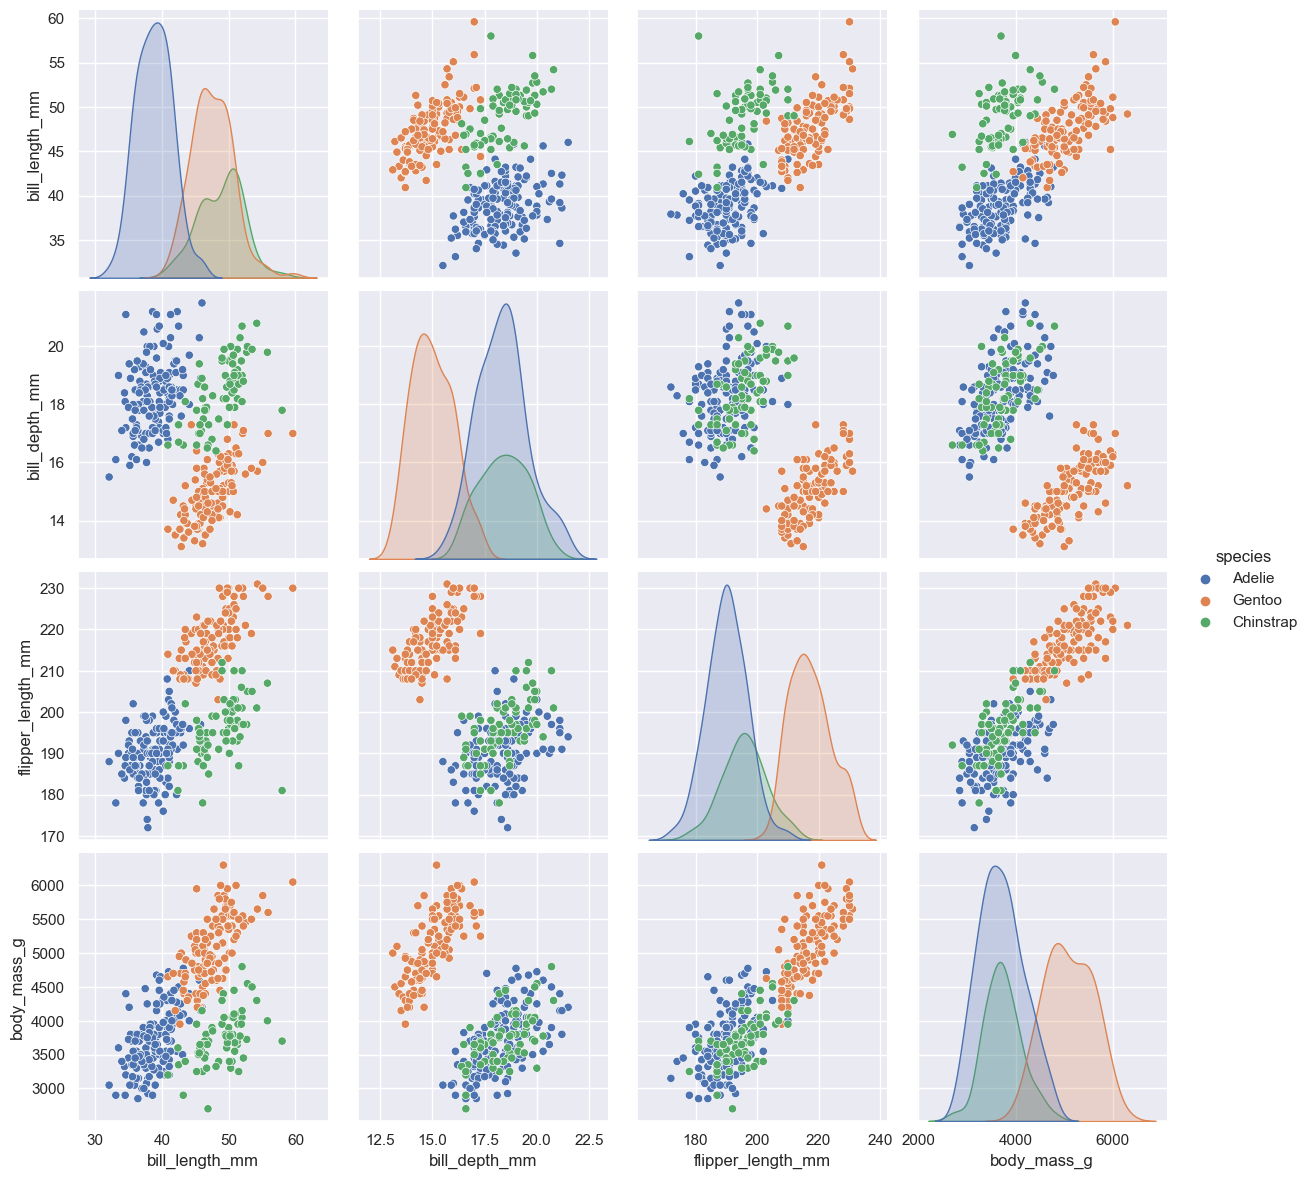

In [70]:
sns.pairplot(df, hue='species', height=3, aspect=1);

In [76]:
import pandas as pd
dfdummies1 = pd.get_dummies(df,columns= ['island','sex'])
dfdummies1

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,0,1,0,0,1
329,Chinstrap,43.5,18.1,202,3400,0,1,0,1,0
330,Chinstrap,49.6,18.2,193,3775,0,1,0,0,1
331,Chinstrap,50.8,19.0,210,4100,0,1,0,0,1


In [81]:
dfdummies2 = pd.get_dummies(df,columns= ['island','species'])
dfdummies2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181,3750,male,0,0,1,1,0,0
1,39.5,17.4,186,3800,female,0,0,1,1,0,0
2,40.3,18.0,195,3250,female,0,0,1,1,0,0
3,36.7,19.3,193,3450,female,0,0,1,1,0,0
4,39.3,20.6,190,3650,male,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,male,0,1,0,0,1,0
329,43.5,18.1,202,3400,female,0,1,0,0,1,0
330,49.6,18.2,193,3775,male,0,1,0,0,1,0
331,50.8,19.0,210,4100,male,0,1,0,0,1,0


In [102]:
X = dfdummies1.drop(columns= 'species')
y = dfdummies1['species']


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
model.predict([[39.1,18.7,181,3750,0,0,1,0,1]])[0]

'Adelie'

In [115]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv = 5)
scores

array([0.97014925, 0.98507463, 0.98507463, 1.        , 0.98484848])

In [116]:
import numpy as np
acc_cv = np.mean(scores).round(3)
acc_cv

0.985

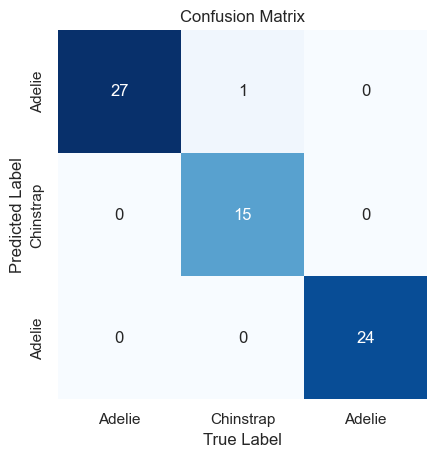

In [123]:
from sklearn.metrics import confusion_matrix
labels = ['Adelie','Chinstrap','Adelie']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');